## Inferential Visualizations
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
# Access scaled & Test/Train-Split variables from Notebooks 02 & 03
%store -r X_train
%store -r X_test
%store -r X_train_ss
%store -r X_test_ss
%store -r y_train
%store -r y_test
%store -r features
%store -r feature_dict

In [4]:
# List ID of X-features included in Linear Regression Model
#features =['Year Remod/Add', 'Year Built', '1st Flr SF','Total Bsmt SF','Garage Area', 'Gr Liv Area', 'Overall Qual']

In [7]:
lm = LinearRegression()
lm.fit(X_train_ss,y_train)
# Create predictions using the `lm` object.
y_pred              = lm.predict(X_test_ss)

#Create a list of y_pred, b/c I am trying to make it a column on the X_test_ss df, b/c I want to use sns.regplot since I don't know what to think of plt.plot, plt.scatter
X_test['y_pred'] = y_pred #Also I dont know what to think of negative Sale Price on variance of errors plot

In [10]:
# Verify dimensions in X and y represent an equal number of observations in each, n = No. of rows
print('X:        ', X_test.shape) # X.shape equals (n,p)
print('y_actual: ', y_test.shape) # y.shape equals (n, null)
print('y_preds: ', y_preds.shape)

X:         (513, 8)
y_actual:  (513,)
y_preds:  (513,)


### LINE Assumptions: Linearity
- y is linearly related to X

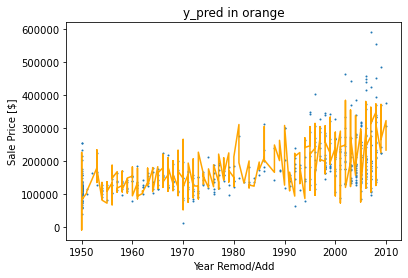

In [64]:
# Plot the predictions to gain a sense of the accuracy of the model
plt.scatter(X_test['Year Remod/Add'], y_test, s = 1);
plt.plot(X_test['Year Remod/Add'].sort_values(), X_test.sort_values(by='Year Remod/Add')['y_pred'], color = 'orange');
#plt.plot(X_test['Year Remod/Add'].sort_values(), Y, color = 'orange');
#plt.xlim(0, 50)
#plt.ylim(0, 10);
plt.xlabel(f'Year Remod/Add');
plt.ylabel('Sale Price [$]');
plt.title(f'y_pred in orange');

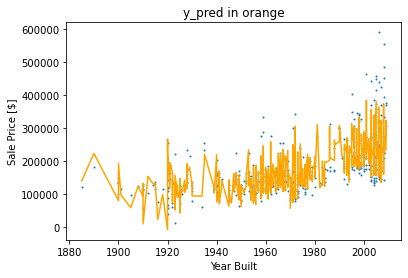

In [43]:
### Plot the predictions to gain a sense of the accuracy of the model
plt.scatter(X_test['Year Built'], y_test, s = 1);
plt.plot(X_test['Year Built'].sort_values(), X_test.sort_values(by='Year Built')['y_pred'], color = 'orange');
#plt.xlim(0, 50)
#plt.ylim(0, 10);
plt.xlabel(f'Year Built');
plt.ylabel('Sale Price [$]');
plt.title(f'y_pred in orange');

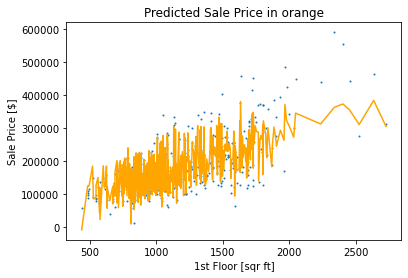

In [21]:
# Plot the predictions to gain a sense of the accuracy of the model
plt.scatter(X_test['1st Flr SF'], y_test, s = 1);
plt.plot(X_test['1st Flr SF'].sort_values(), X_test.sort_values(by='1st Flr SF')['y_pred'], color = 'orange');
#plt.xlim(0, 50)
#plt.ylim(0, 10);
plt.xlabel(f'1st Floor [sqr ft]');
plt.ylabel('Sale Price [$]');
plt.title(f'Predicted Sale Price in orange');

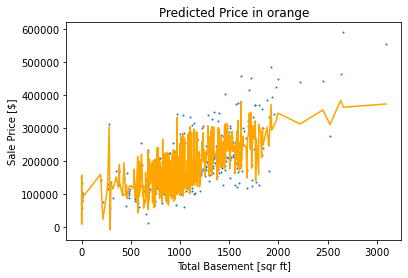

In [23]:
# Plot the predictions to gain a sense of the accuracy of the model
plt.scatter(X_test['Total Bsmt SF'], y_test, s = 1);
plt.plot(X_test['Total Bsmt SF'].sort_values(), X_test.sort_values(by='Total Bsmt SF')['y_pred'], color = 'orange');
#plt.xlim(0, 50)
#plt.ylim(0, 10);
plt.xlabel(f'Total Basement [sqr ft]');
plt.ylabel('Sale Price [$]');
plt.title(f'Predicted Price in orange');

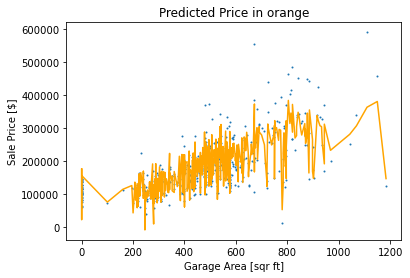

In [24]:
# Plot the predictions to gain a sense of the accuracy of the model
plt.scatter(X_test['Garage Area'], y_test, s = 1);
plt.plot(X_test['Garage Area'].sort_values(), X_test.sort_values(by='Garage Area')['y_pred'], color = 'orange');
#plt.xlim(0, 50)
#plt.ylim(0, 10);
plt.xlabel(f'Garage Area [sqr ft]');
plt.ylabel('Sale Price [$]');
plt.title(f'Predicted Price in orange');

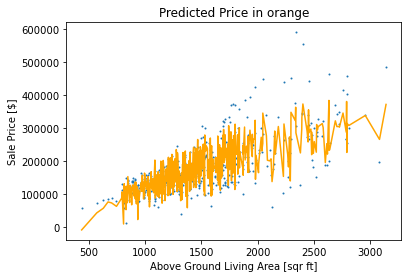

In [25]:
# Plot the predictions to gain a sense of the accuracy of the model
plt.scatter(X_test['Gr Liv Area'], y_test, s = 1);
plt.plot(X_test['Gr Liv Area'].sort_values(), X_test.sort_values(by='Gr Liv Area')['y_pred'], color = 'orange');
#plt.xlim(0, 50)
#plt.ylim(0, 10);
plt.xlabel(f'Above Ground Living Area [sqr ft]');
plt.ylabel('Sale Price [$]');
plt.title(f'Predicted Price in orange');

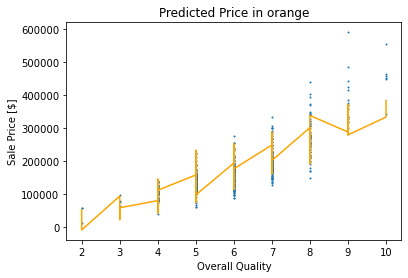

In [65]:
# Plot the predictions to gain a sense of the accuracy of the model
plt.scatter(X_test['Overall Qual'], y_test, s = 1);
plt.plot(X_test['Overall Qual'].sort_values(), X_test.sort_values(by='Overall Qual')['y_pred'], color = 'orange');
#plt.xlim(0, 50)
#plt.ylim(0, 10);
plt.xlabel(f'Overall Quality');
plt.ylabel('Sale Price [$]');
plt.title(f'Predicted Price in orange');

### LINE Assumptions: Normality of Errors

Mean of resids: -180.88


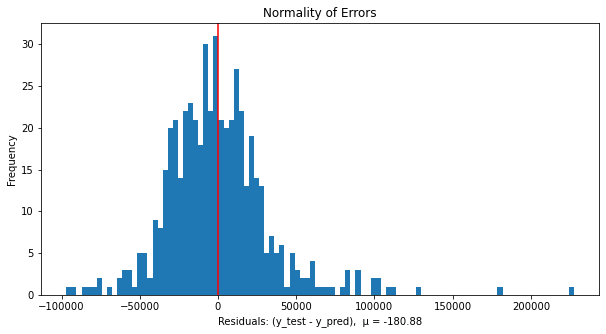

In [61]:
# N - Normality of errors
resids = y_test - y_preds
plt.figure(figsize = (10, 5));
plt.hist(resids, bins=100);
plt.axvline(0,color='red')
plt.xlabel(f'Residuals: (y_test - y_pred),  \u03BC = {round(resids.mean(),2)}');
plt.ylabel('Frequency');
plt.title(f'Normality of Errors');
print(f'Mean of resids: {round(resids.mean(),2)}')

### LINE Assumptions: Equal Variance of Errors

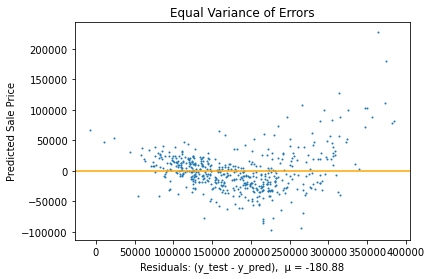

In [62]:
# E-Equal Variance of Errors: errors should have consistent pattern for all X-values, resids should have no relationship w/ X
plt.scatter(y_preds, resids, s=1, )
plt.axhline(resids.mean(), color="orange");
plt.xlabel(f'Residuals: (y_test - y_pred),  \u03BC = {round(resids.mean(),2)}');
plt.ylabel(f'Predicted Sale Price');
plt.title(f'Equal Variance of Errors');

### Root Mean Squared Error

In [63]:
# Score it: Evaluate the model locally with training values of Sale Price
# Mean Squared Error (MSE)
MSE = metrics.mean_squared_error(y_test,y_preds)
print(f'MSE: {MSE:,.2f}')
# Root Mean Squared Error (RMSE)
RMSE = metrics.mean_squared_error(y_test,y_preds,squared=False)
print(f'RMSE: {RMSE:,.2f}')

MSE: 1,130,474,963.52
RMSE: 33,622.54
